In [2]:
import h5py
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio

In [4]:
#fn = "/Users/aidanmorson/Documents/GitHub/RHOSTS/Sample_results/trial_gen/results_T0_5.txt.hd5"
f = h5py.File('../Sample_results/trial_gen/edges_projection.hd5', 'r')
list1 = list(f.keys())
print(list1)

g=h5py.File('../High_order_TS/test_results/run2HCP.hd5', 'r')
list2=list(g.keys())
print(list2)

h=h5py.File('../run2HCP.hd5', 'r')
print(list(h.keys()))
e=h5py.File('../run1.hd5', 'r')
print(list(e.keys()))




[]
['0', '1', '2', '3', '4']
[]
[]


In [10]:
import h5py
import numpy as np

# Open the HDF5 file
with h5py.File('../High_order_TS/test_results/run2HCP.hd5', 'r') as g:
    # Iterate over the keys
    for key in g.keys():
        print(f"Key: {key}")

        # Check if the key corresponds to a group
        if isinstance(g[key], h5py.Group):
            print(f"Type: Group")
            
            # Iterate over the items (datasets) within the group
            for subkey in g[key].keys():
                print(f"  Subkey: {subkey}")
                data = g[key][subkey][...]  # Access the data, you can modify this part based on the actual structure

                # Now 'data' contains the actual dataset, and you can perform operations on it
                print(f"    Data shape: {data.shape}")
        else:
            # Assume it's a dataset if it's not a group
            print(f"Type: Dataset")
            data = g[key][...]  # Access the data, you can modify this part based on the actual structure
            print(f"  Data shape: {data.shape}")


Key: 0
Type: Dataset
  Data shape: (4033, 4)
Key: 1
Type: Dataset
  Data shape: (3861, 4)
Key: 2
Type: Dataset
  Data shape: (3753, 4)
Key: 3
Type: Dataset
  Data shape: (3663, 4)
Key: 4
Type: Dataset
  Data shape: (3493, 4)


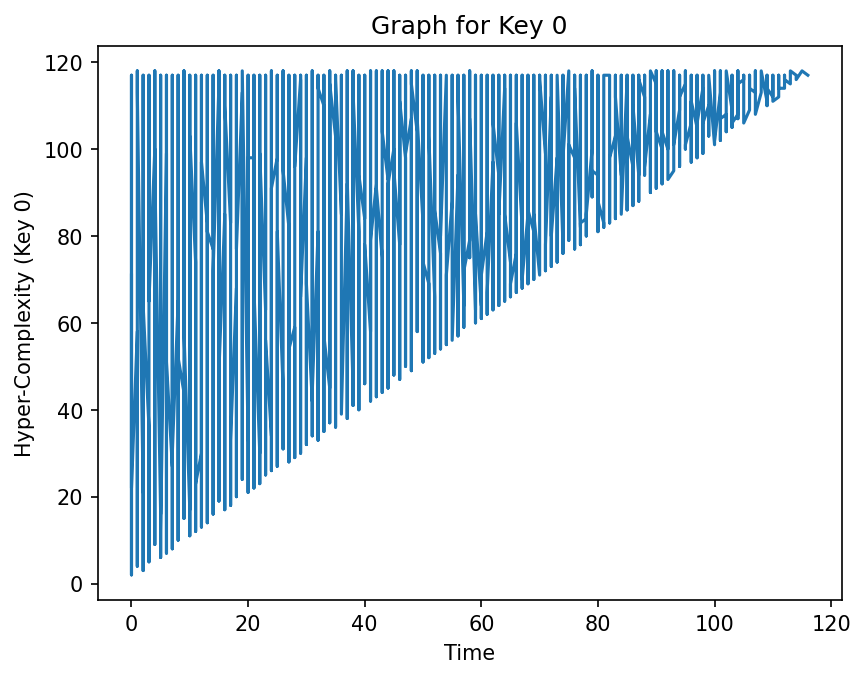

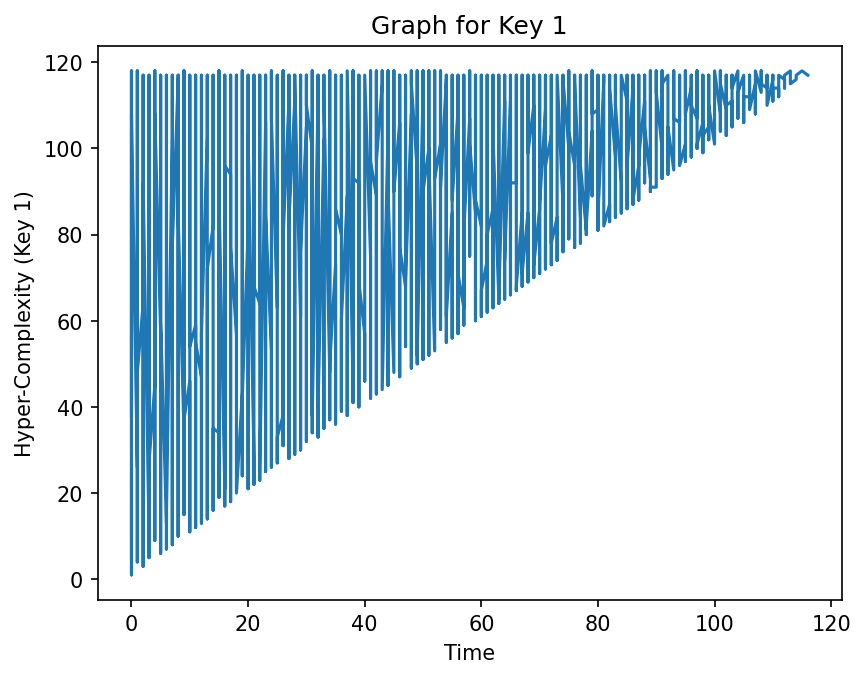

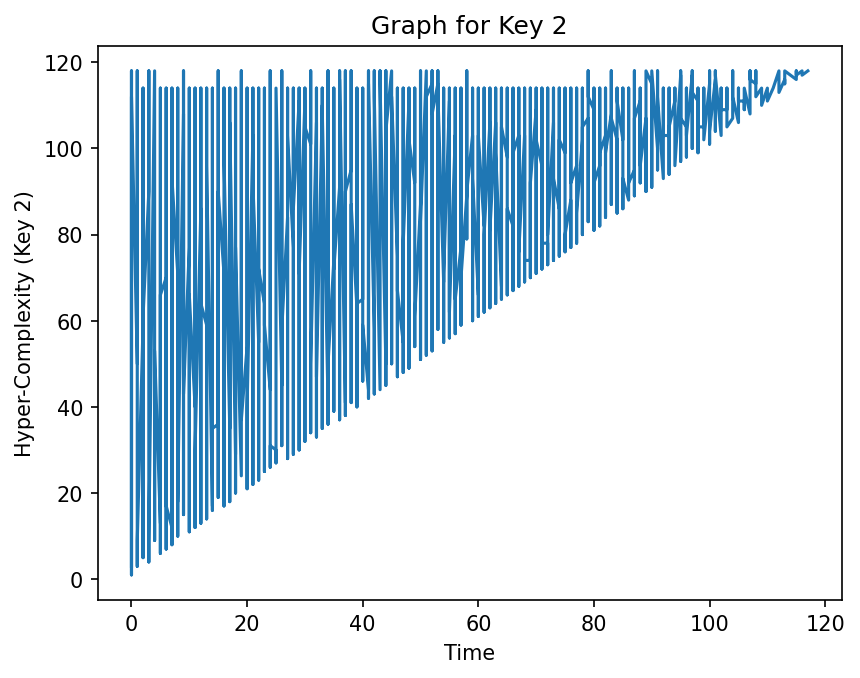

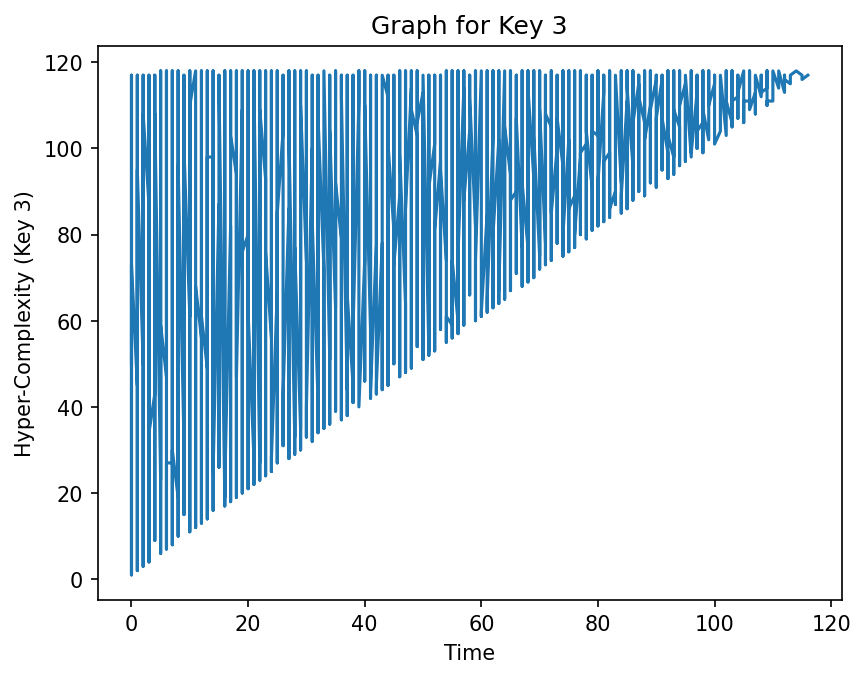

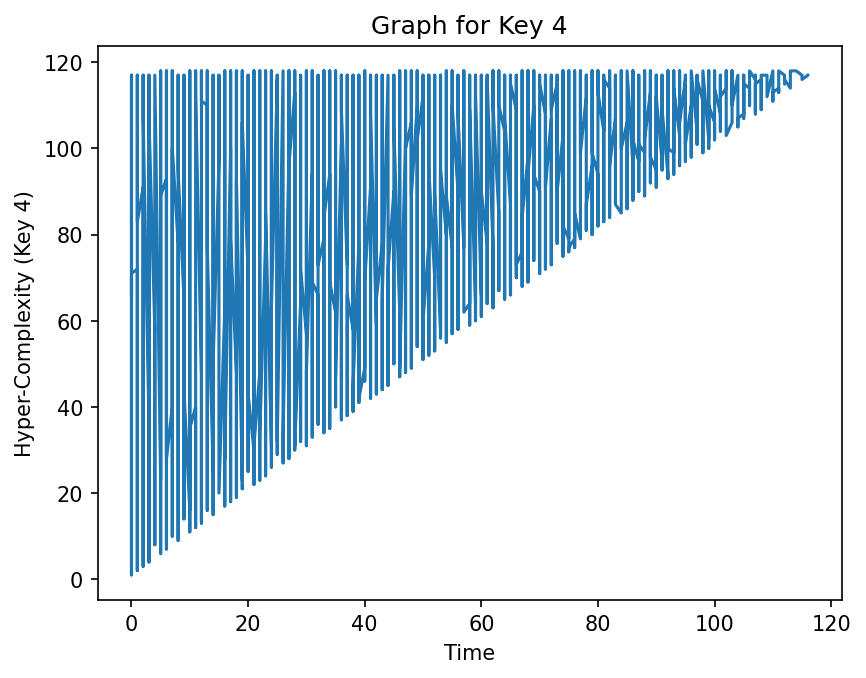

In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Open the HDF5 file
with h5py.File('../High_order_TS/test_results/run2HCP.hd5', 'r') as g:
    # Iterate over keys '0' to '4'
    for key in map(str, range(5)):
        # Access the data from the current key
        data = g[key][...]

        # Sort the data based on the first column (assuming it's a time column)
        data_sorted = data[np.argsort(data[:, 0])]

        # Plotting
        plt.figure(dpi=150)
        plt.plot(data_sorted[:, 0], data_sorted[:, 1])
        plt.xlabel("Time")
        plt.ylabel(f"Hyper-Complexity (Key {key})")
        plt.title(f"Graph for Key {key}")
        plt.show()


In [7]:
sys.path.append('../High_order_TS_with_scaffold/') # add parent directory to import the module Holes
import Holes as ho
import pickle as pk
import networkx as nx

In [47]:
def load_scaffold_singletime(filepath_scaffold,single_time,ScafH=nx.Graph(),hom_group=1):
    f=open(filepath_scaffold+'generators__{0}.pck'.format(single_time), 'rb')
    
    gen = pk.load(f)

    edges = []
    for c in gen[hom_group]:
        for e in c.cycles():
            #print(e)
            u , v = int(e[0]) , int(e[1])
            if ScafH.has_edge(u,v):
                ScafH[u][v]['weight'] += c.persistence_interval()
            else:
                ScafH.add_edge(u, v, weight=c.persistence_interval())
    f.close()
    return(ScafH)

In [48]:
ScafH=load_scaffold_singletime('../Sample_results/trial_gen/',single_time='0',ScafH=nx.Graph(),hom_group=1)

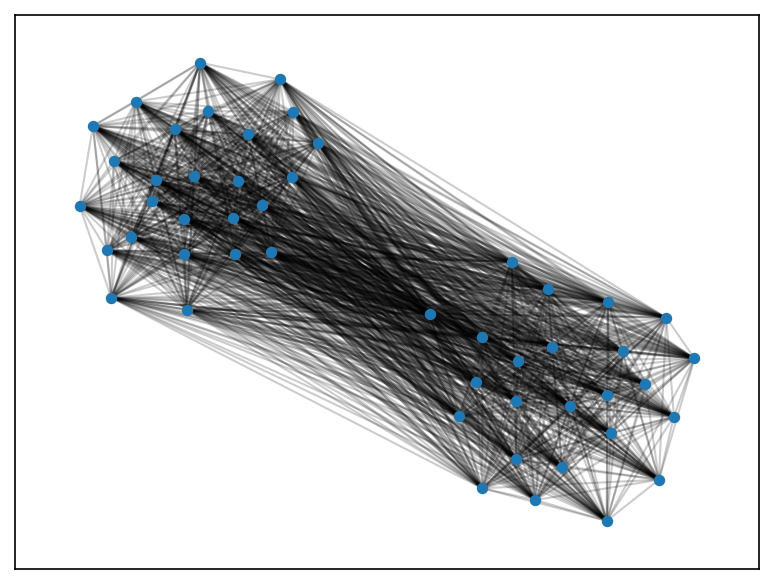

In [54]:
plt.figure(dpi=150)
layout = nx.drawing.layout.spring_layout(ScafH)
#nx.draw(ScafH, pos=layout, node_size=20,alpha=0.25)
nx.draw_networkx_edges(ScafH, pos=layout,alpha=0.2)
nx.draw_networkx_nodes(ScafH, pos=layout,node_size=20)


In [11]:
import numpy as np
data = np.load('/Users/aidanmorson/Desktop/neuro/data/Trace_20220510_21_20_28_chip11350_phy/spike_times.npy')
print(np.shape(data))
print(np.ndim(data))
print(np.size(data))

(122403, 1)
2
122403
122403
